In [15]:
from fbm import *
import matplotlib.pyplot as plt
import numpy as np

In [81]:
def bm(n_steps, dt):
    gn = np.random.normal(0, np.sqrt(dt), n_steps)
    path = np.zeros(n_steps)
    for i in range(1, n_steps):
        path[i] = path[i-1] + gn[i-1]
    return path 

In [84]:
chol = sim.CholeskyFBmGenerator()
n_dim = 1 # number of dimensions
H = 0.5  # Hurst parameter
T = 100.0  # Total time
dt = 0.5 # time step size
n_steps = int(T / dt) # number of steps

n_reps = 100000
tries_fbm = np.zeros((n_steps, n_reps))
tries_bm = np.zeros((n_steps, n_reps))
for i in range(n_reps):
    fbm_chol = chol.generate_fBm(H=0.5, size=n_steps)
    tries_fbm[:, i] = fbm_chol
    tries_bm[:, i] = bm(n_steps, dt)

In [87]:
np.insert([1,2,3,4], [0], 0)

array([0, 1, 2, 3, 4])

Text(0.5, 1.0, 'BM')

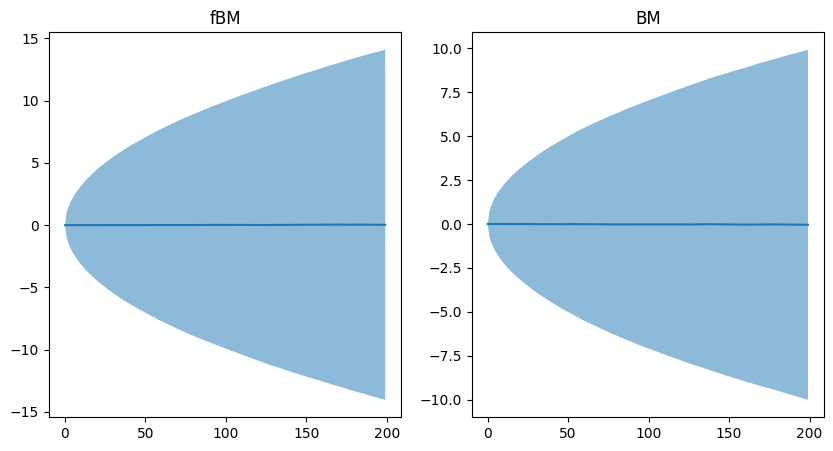

In [85]:
mean_fbm = np.mean(tries_fbm, axis=1)
std_fbm = np.std(tries_fbm, axis=1)

mean_bm = np.mean(tries_bm, axis=1)
std_bm = np.std(tries_bm, axis=1)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(mean_fbm)
ax[0].fill_between(np.arange(n_steps), mean_fbm - std_fbm, mean_fbm + std_fbm, alpha=0.5)
ax[0].set_title('fBM')
ax[1].plot(mean_bm)
ax[1].fill_between(np.arange(n_steps), mean_bm - std_bm, mean_bm + std_bm, alpha=0.5)
ax[1].set_title('BM')
